### Having a mess around with the Power Production dataset

In [17]:
import pandas as pd
import sklearn as sklearn
import seaborn as sns
import numpy as numpy
import sklearn.linear_model as lin
#stackoverflow chat suggests that you can't import an external dataset into seaborn, use pandas instead??!!
#It's as though if it's not here >>>https://github.com/mwaskom/seaborn<<< seaborn doesn't want to know.
powerproduction=pd.read_csv("powerproduction.csv")
#powerproduction.describe()
print(powerproduction)


      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Analysis

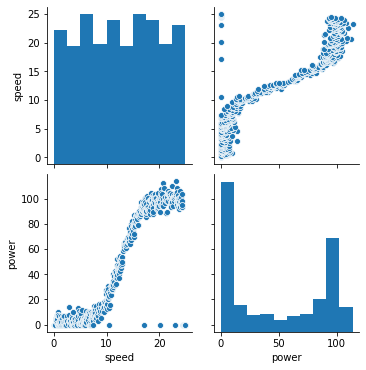

In [3]:
sns.pairplot(powerproduction)

### Functions to draw linear regression models

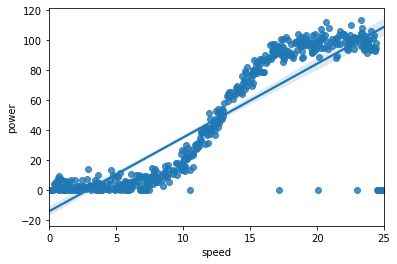

In [18]:
sns.regplot(x="speed", y="power", data=powerproduction);
#a blue line appears as a suggestion

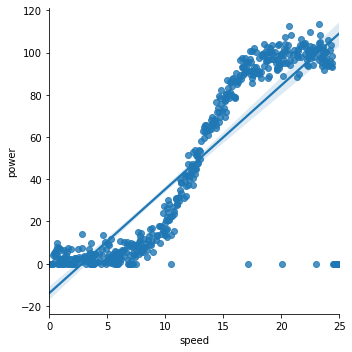

In [19]:
sns.lmplot(x="speed", y="power", data=powerproduction);

### Source: https://seaborn.pydata.org/tutorial/regression.html
You should note that the resulting plots are identical, except that the figure shapes are different. <br>
 regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. Other than this input flexibility, regplot() possesses a subset of lmplot()’s features, so we will demonstrate them using the latter.

#### Observations on these graphs
The curve shape corresponds with graphs at https://energyeducation.ca/encyclopedia/Wind_power
It is logical, it takes a reasonable amount of wind to get the turbine going and then when it's moving and the wind drops...it will still rotate and come to a stop eventually.<br>
The cut off point seems to be around speed kmph? 24.5. Perhaps it is dangerous for the turbine to move at a high speed.

>>Turbines are designed to operate within a specific range of wind speeds. The limits of the range are known as the cut-in speed and cut-out speed.[5] The cut-in speed is the point at which the wind turbine is able to generate power. The cut-out speed is the point at which the turbine must be shut down to avoid damage to the equipment. The cut-in and cut-out speeds are related to the turbine design and size and are decided on prior to construction.[6]

### Train
Attempt to automate the prediction, find relationships between the paired data.

In [ ]:
import sklearn.linear_model as lin
#manipulate the two lists of numbers
x = flipper["body_mass_g"].to_numpy()
y = flipper["flipper_length_mm"].to_numpy()
#even though you've only one input value, you must reshape as if there are more. It is ascikit learm thing....
x = x.reshape(-1, 1)
#use sckitlearn to give numbers pertaining to the suggested blue line above
model = lin.LinearRegression()
model.fit(x, y)#tells skcitlearn where the values are
r = model.score(x, y)#find out the r value, how well the lines fits the data set
p = [model.intercept_, model.coef_[0]]#provide the intercept

In [26]:


x=powerproduction["speed"].to_numpy()

y=powerproduction["power"].to_numpy()
#y = data["power"].to_numpy()

x = speed.reshape(-1, 1)
model = lin.LinearRegression()
model.fit(x, y)#tells skcitlearn where the values are
r = model.score(x, y)#find out the r value, how well the lines fits the data set
p = [model.intercept_, model.coef_[0]]#provide the intercept


In [27]:
r
#.72 is not too bad of a fit
#In statistics, the correlation coefficient r measures the strength 
#and direction of a linear relationship between two variables on a scatterplot.

0.7289360258564073

In [28]:
p#the minimum value -13 windspeed delivers 4.9 units of power....that don't sound right

[-13.89990263051962, 4.917595665404669]

In [ ]:
### Predict

In [30]:
def f(x, p):
# x is the input, p is the parameter/s e.g. a list of values somehow trained on a dataset already
# p can be used to help us make predictions in the case of x
    return p[0] + x * p[1]
#this function is designed to provide linear results

per Ian.....
the calculations are straightforward,our ideas behind them are important.
the functions might be deterministic
maybe the input becomes part of the function (not external data anymore)

In [33]:
f(7, p)
#we can use the p values above where 7 windspeed, how much power is generated?
#we trained p on the dataset, it is a model
#you could define another function using p also , see below.

20.52326702731306

In [31]:
def predict(x):
    return f(x, p)

In [47]:
predict(2.9)

0.3611247991539184

In [ ]:
The web service needs to get input into the function.
The function needs to reject amounts higher than 24.399
The function needs to reject amounts lower than 0.325

When I leave the dataset as it is , the figures are skewed - it is giving negative value.
Remove the problematic values to train it properly